In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gc
import random
from itertools import chain
 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.utils.plot_model import plot_model
import tensorflow as tf
 
%matplotlib inline

In [2]:
dog_breeds = os.listdir('../input/stanford-dogs-dataset/images/Images/')
print(dog_breeds)

['n02095570-Lakeland_terrier', 'n02095314-wire-haired_fox_terrier', 'n02086910-papillon', 'n02100877-Irish_setter', 'n02097658-silky_terrier', 'n02089078-black-and-tan_coonhound', 'n02091134-whippet', 'n02093754-Border_terrier', 'n02110627-affenpinscher', 'n02092339-Weimaraner', 'n02113799-standard_poodle', 'n02111277-Newfoundland', 'n02099267-flat-coated_retriever', 'n02091032-Italian_greyhound', 'n02102318-cocker_spaniel', 'n02086646-Blenheim_spaniel', 'n02096585-Boston_bull', 'n02092002-Scottish_deerhound', 'n02096437-Dandie_Dinmont', 'n02104029-kuvasz', 'n02097209-standard_schnauzer', 'n02096294-Australian_terrier', 'n02085782-Japanese_spaniel', 'n02111500-Great_Pyrenees', 'n02087394-Rhodesian_ridgeback', 'n02110063-malamute', 'n02107683-Bernese_mountain_dog', 'n02091831-Saluki', 'n02112706-Brabancon_griffon', 'n02094114-Norfolk_terrier', 'n02088632-bluetick', 'n02104365-schipperke', 'n02096051-Airedale', 'n02091635-otterhound', 'n02093991-Irish_terrier', 'n02102973-Irish_water_spa

In [3]:
filtered_breeds = [breed.split('-',1)[1] for breed in dog_breeds]
filtered_breeds[:]

['Lakeland_terrier',
 'wire-haired_fox_terrier',
 'papillon',
 'Irish_setter',
 'silky_terrier',
 'black-and-tan_coonhound',
 'whippet',
 'Border_terrier',
 'affenpinscher',
 'Weimaraner',
 'standard_poodle',
 'Newfoundland',
 'flat-coated_retriever',
 'Italian_greyhound',
 'cocker_spaniel',
 'Blenheim_spaniel',
 'Boston_bull',
 'Scottish_deerhound',
 'Dandie_Dinmont',
 'kuvasz',
 'standard_schnauzer',
 'Australian_terrier',
 'Japanese_spaniel',
 'Great_Pyrenees',
 'Rhodesian_ridgeback',
 'malamute',
 'Bernese_mountain_dog',
 'Saluki',
 'Brabancon_griffon',
 'Norfolk_terrier',
 'bluetick',
 'schipperke',
 'Airedale',
 'otterhound',
 'Irish_terrier',
 'Irish_water_spaniel',
 'miniature_schnauzer',
 'Ibizan_hound',
 'toy_terrier',
 'Appenzeller',
 'Mexican_hairless',
 'soft-coated_wheaten_terrier',
 'Sussex_spaniel',
 'bloodhound',
 'Welsh_springer_spaniel',
 'Chihuahua',
 'Shetland_sheepdog',
 'kelpie',
 'Siberian_husky',
 'komondor',
 'malinois',
 'Lhasa',
 'Border_collie',
 'American_

In [4]:
X = []
y = []

fullpaths = ['../input/stanford-dogs-dataset/images/Images/{}'.format(dog_breeds) for dog_breeds in dog_breeds]

for counter, fullpath in enumerate(fullpaths):
    for imgname in os.listdir(fullpath):
        X.append([fullpath + '/' + imgname])
        y.append(filtered_breeds[counter])

X = list(chain.from_iterable(X))

len(X)

20580

In [5]:
combined = list(zip(X, y))
random.shuffle(combined)

X[:], y[:] = zip(*combined)

In [6]:
X = X[:4000]
y = y[:4000]

In [7]:
labels = LabelEncoder()
labels.fit(y)
label_encoded = to_categorical(labels.transform(y), len(filtered_breeds))
label_encoded = np.array(label_encoded)

In [8]:
images = np.array([img_to_array(load_img(img, target_size = (299,299))) for img in X]) 

x_train, x_test, y_train, y_test = train_test_split(images, label_encoded, test_size = 0.3,stratify = np.array(y), random_state = 120) 

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size = 0.3,stratify=np.array(y_train),random_state = 120)

print('Training Dataset Size: ', x_train.shape)
print('Training Label Size: ', y_train.shape)
print('Validation Dataset Size: ', x_val.shape)
print('Validation Label Size: ', y_val.shape)
print('Testing Dataset Size: ', x_test.shape)
print('Testing Label Size: ', y_test.shape)

Training Dataset Size:  (1960, 299, 299, 3)
Training Label Size:  (1960, 120)
Validation Dataset Size:  (840, 299, 299, 3)
Validation Label Size:  (840, 120)
Testing Dataset Size:  (1200, 299, 299, 3)
Testing Label Size:  (1200, 120)


In [9]:
del images
gc.collect()

46

In [21]:
pre_trained_model =  InceptionV3(weights = "imagenet", input_shape=(299,299,3), include_top= False)

for layer in pre_trained_model.layers:
    layer.trainable=False
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [30]:
last_layer = pre_trained_model.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 2048)


In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [52]:
model = models.Sequential()
model.add(pre_trained_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten()) 
model.add(Dropout(0.3))
model.add(Dense(2048, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(len(filtered_breeds), activation = 'softmax'))

model.compile(optimizer = RMSprop(lr=0.001), loss ='categorical_crossentropy', metrics =['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 2048)              4196352   
_________________________________________________________________
dense_31 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_32 (Dense)             (None, 512)              

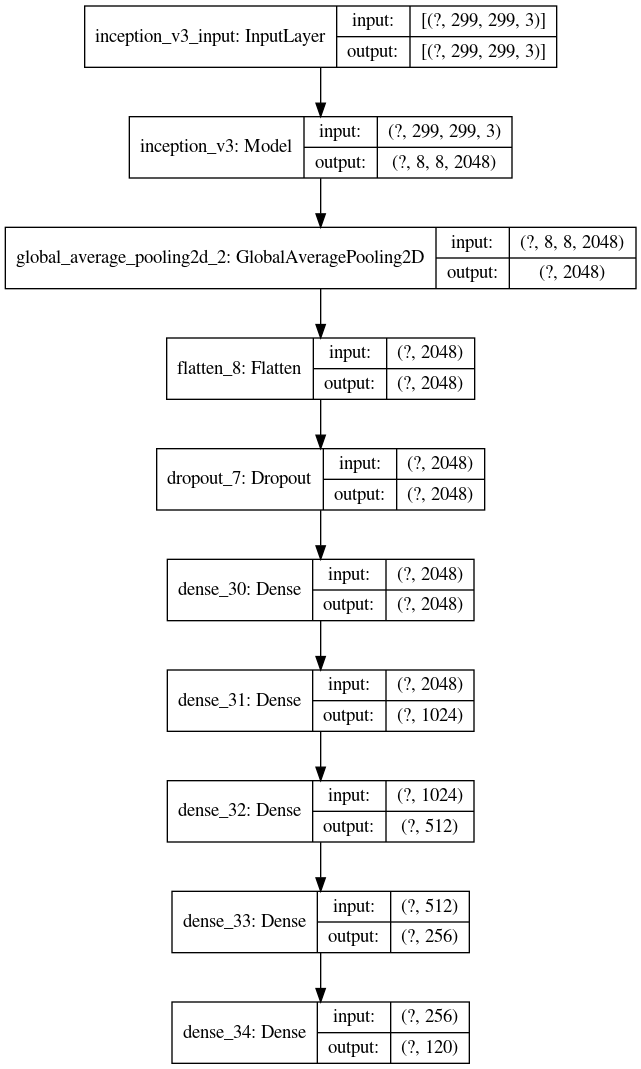

In [53]:
tf.keras.utils.plot_model(model, to_file='RMSprop.png', show_shapes=True, show_layer_names=True)

In [54]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
)

train_generator = train_datagen.flow(x_train, y_train,shuffle = False, batch_size = 25)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator =  val_datagen.flow(x_val, y_val, shuffle = False, batch_size = 25)

In [55]:
callbacks = myCallback()

epochs = 40
history = model.fit_generator(train_generator,epochs=epochs,validation_data=validation_generator,callbacks=[callbacks])

Epoch 1/40
79/79 [==============================] - 41s 521ms/step - loss: 4.7693 - accuracy: 0.0413 - val_loss: 4.0210 - val_accuracy: 0.0940
Epoch 2/40
79/79 [==============================] - 40s 500ms/step - loss: 2.8971 - accuracy: 0.2857 - val_loss: 2.1878 - val_accuracy: 0.3845
Epoch 3/40
79/79 [==============================] - 38s 484ms/step - loss: 1.7398 - accuracy: 0.5000 - val_loss: 1.0699 - val_accuracy: 0.6548
Epoch 4/40
79/79 [==============================] - 39s 492ms/step - loss: 1.4087 - accuracy: 0.5944 - val_loss: 0.8921 - val_accuracy: 0.7167
Epoch 5/40
79/79 [==============================] - 39s 489ms/step - loss: 1.2180 - accuracy: 0.6469 - val_loss: 0.8335 - val_accuracy: 0.7571
Epoch 6/40
79/79 [==============================] - 38s 481ms/step - loss: 1.1401 - accuracy: 0.6592 - val_loss: 0.6814 - val_accuracy: 0.7714
Epoch 7/40
79/79 [==============================] - 39s 491ms/step - loss: 1.0533 - accuracy: 0.7046 - val_loss: 0.7032 - val_accuracy: 0.7821

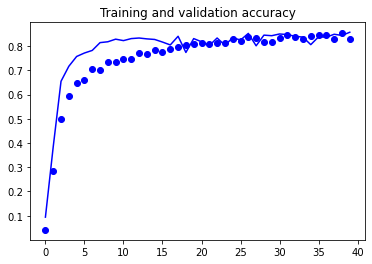

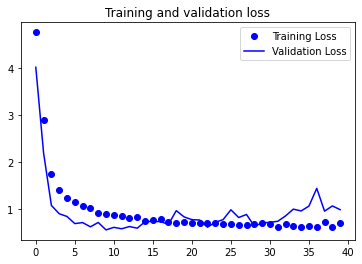

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()